In [1]:
# CELL1

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import Lipinski
import numpy as np
import pandas as pd

In [218]:
# CELL 2

df = pd.read_csv('https://raw.githubusercontent.com/GLambard/Molecules_Dataset_Collection/master/originals/ESOL_delaney-processed.csv')
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,structure
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,

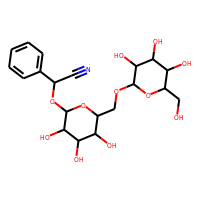
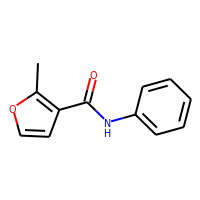
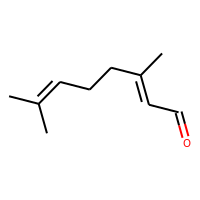
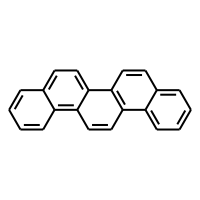
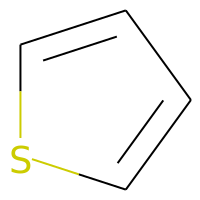

In [240]:
# CELL 3

PandasTools.AddMoleculeColumnToFrame(df, 'smiles', 'structure')
df.head()

,structure,Compound ID,HDonors,HAcceptors,MolWeight,LogP,target
0,,Amigdalin,7,12,457.432,-3.10802,0
1,,Fenfuram,1,2,201.225,2.84032,1
2,,citral,0,1,152.237,2.87800,1
3,,Picene,0,0,278.354,6.29940,1
4,,Thiophene,0,1,84.143,1.74810,1

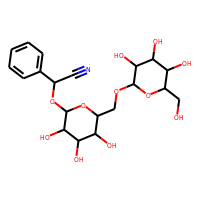
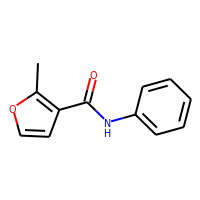
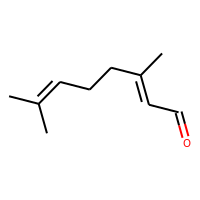
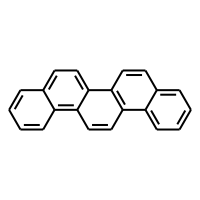
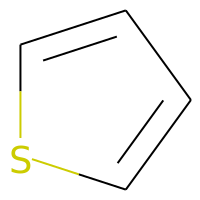

In [248]:
# CELL 4

# create a new dataframe using only structure and id columns
ndf = df[['structure','Compound ID']]

# drop rows that contain NaNs
ndf = ndf.dropna(axis=0).reset_index(drop=True)

# calculate required descriptors
ndf['HDonors'] = [Lipinski.NumHDonors(mol) for mol in ndf.structure]
ndf['HAcceptors'] = [Lipinski.NumHAcceptors(mol) for mol in ndf.structure]
ndf['MolWeight'] = [Descriptors.MolWt(mol) for mol in ndf.structure]
ndf['LogP'] = [Descriptors.MolLogP(mol) for mol in ndf.structure]

# create a Lipinski rule check column and name it target
ndf['target'] = [int(int(row.HDonors<=5) + int(row.HAcceptors<=10) + int(row.MolWeight<=500) + int(row.LogP<=5) >= 3) for index, row in ndf.iterrows()]
ndf.head()

In [249]:
ndf.columns

Index(['structure', 'Compound ID', 'HDonors', 'HAcceptors', 'MolWeight',
       'LogP', 'target'],
      dtype='object')

,structure,Compound ID,HDonors,HAcceptors,MolWeight,LogP,target
0,,Amigdalin,7,12,457.432,-3.10802,False
219,,"Etoposide (148-167,25mg/ml)",3,13,588.562,1.33860,False
272,,Deltamethrin,0,4,505.206,6.49018,False
298,,Raffinose,11,16,504.438,-7.57140,False
441,,Lactose,8,11,342.297,-5.39720,False
482,,Fluvalinate,1,5,502.920,7.39568,False
555,,"Digoxin (L1=41,8mg/mL, L2=68,2mg/mL, Z=40,1mg/mL)",6,14,780.949,2.21810,False
640,,Digitoxin,5,13,764.950,3.24730,False
939,,bromadiolone,2,4,527.414,7.18370,False
988,,Mirex,0,0,545.546,6.22300,False

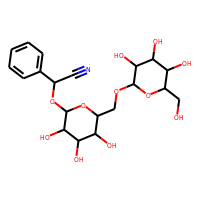
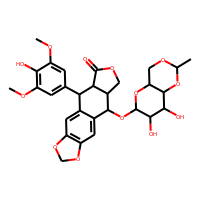
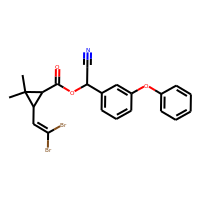
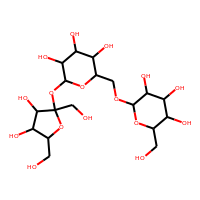
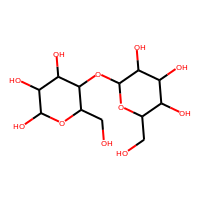
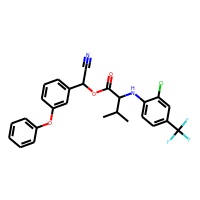
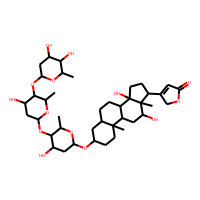
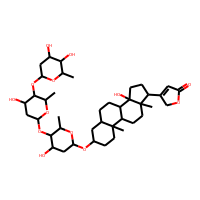
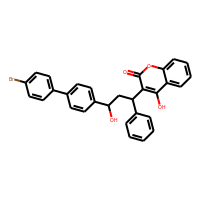
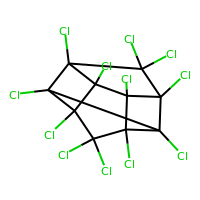
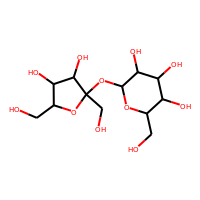
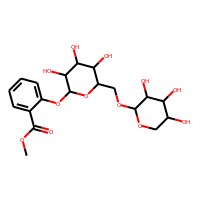

In [246]:
ndf[ndf.target==False]

In [219]:
finaldf = ndf.drop('structure',axis=1).iloc[[0,21,77,89,832]]
finaldf['target'] = finaldf['target'].astype(int)
finaldf

,Compound ID,HDonors,HAcceptors,MolWeight,LogP,target
0,Amigdalin,7,12,457.432,-3.10802,0
21,Lenacil,1,3,234.299,1.53050,1
77,"2,3',5-PCB",0,0,257.547,5.31380,1
89,RTI 24,1,3,273.723,3.45870,1
832,Rovral,1,3,330.171,2.88000,1


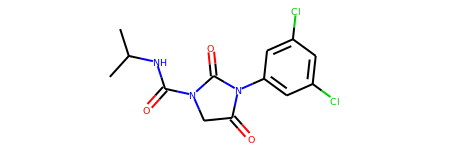

In [220]:
ndf.iloc[[0,21,77,89,832]].structure.iloc[4]

In [221]:
bootdf = finaldf.sample(n=5, replace=True)
bootdf

,Compound ID,HDonors,HAcceptors,MolWeight,LogP,target
0,Amigdalin,7,12,457.432,-3.10802,0
21,Lenacil,1,3,234.299,1.53050,1
0,Amigdalin,7,12,457.432,-3.10802,0
0,Amigdalin,7,12,457.432,-3.10802,0
77,"2,3',5-PCB",0,0,257.547,5.31380,1


In [222]:
finaldf


,Compound ID,HDonors,HAcceptors,MolWeight,LogP,target
0,Amigdalin,7,12,457.432,-3.10802,0
21,Lenacil,1,3,234.299,1.53050,1
77,"2,3',5-PCB",0,0,257.547,5.31380,1
89,RTI 24,1,3,273.723,3.45870,1
832,Rovral,1,3,330.171,2.88000,1


In [224]:
# CELL 5

# imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# data preparation
X = np.array(ndf.drop(['structure', 'Compound ID', 'target'], axis=1))
y = np.array(ndf['target']).astype(int)

# train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
# CELL 6

# instantiate the model
RF = RandomForestClassifier(
    n_estimators=16,
    max_depth=None, 
    max_features='sqrt',
    n_jobs=-1, 
    bootstrap=True, 
    oob_score=True, 
    random_state=42)

# train the model on train subset
RF.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=16, n_jobs=-1,
                       oob_score=True, random_state=42)

In [251]:
# CELL 7

# run a prediction
y_pred = RF.predict(X_test)

# and obtain prediction performance score
f1_score(y_test, y_pred)

0.9977628635346756

In [231]:
RF.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

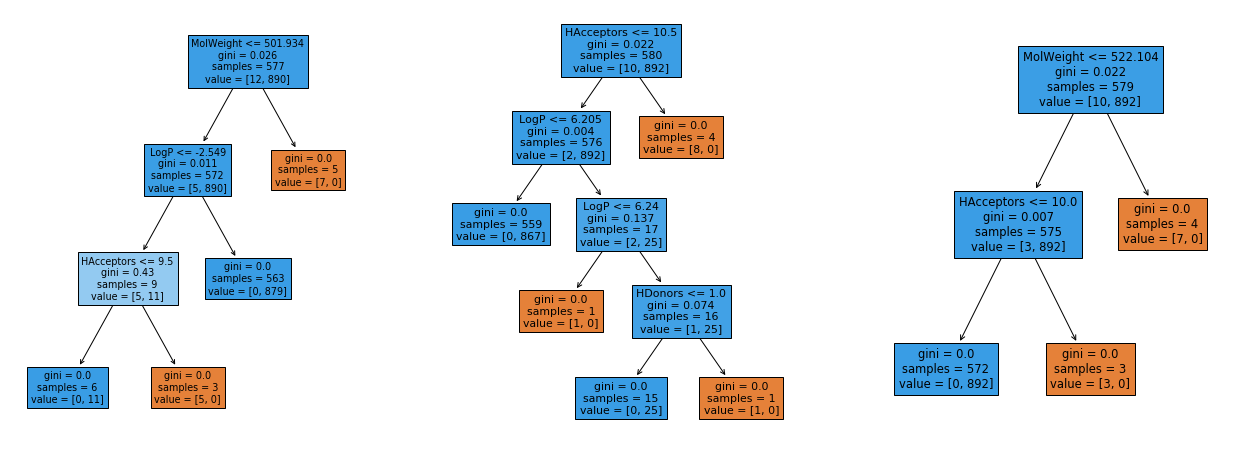

In [256]:
# CELL 8

# imports
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# plotting the n trees in subplots
n = 3
plt.figure(figsize=(22, 8))
for i in range(1, n+1):
    plt.subplot(1, n, i)
    plot_tree(RF.estimators_[i+9],
          feature_names=ndf.drop(['structure', 'Compound ID', 'target'], axis=1).columns,
          filled=True, 
          rounded=False)